In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Bangalore.csv')
df

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,pm25,17.00,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
1,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,so2,11.90,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
2,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,pm10,98.00,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
3,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,co,80.00,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
4,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,o3,25.09,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
...,...,...,...,...,...,...,...,...,...,...,...
61147,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2019-12-31T21:00:00Z,2020-01-01T02:30:00+05:30,pm10,96.00,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
61148,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2019-12-31T21:00:00Z,2020-01-01T02:30:00+05:30,co,610.00,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
61149,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2019-12-31T21:00:00Z,2020-01-01T02:30:00+05:30,so2,14.60,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
61150,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2019-12-31T21:00:00Z,2020-01-01T02:30:00+05:30,o3,32.67,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


In [4]:
df.drop(columns=['attribution','latitude','longitude','country','city','location','utc'],inplace=True)
df.head()

,local,parameter,value,unit
0,2020-12-30T17:15:00+05:30,pm25,17.00,µg/m³
1,2020-12-30T17:15:00+05:30,so2,11.90,µg/m³
2,2020-12-30T17:15:00+05:30,pm10,98.00,µg/m³
3,2020-12-30T17:15:00+05:30,co,80.00,µg/m³
4,2020-12-30T17:15:00+05:30,o3,25.09,µg/m³


In [5]:
df= df[df['value'] != 0]
df

,local,parameter,value,unit
0,2020-12-30T17:15:00+05:30,pm25,17.00,µg/m³
1,2020-12-30T17:15:00+05:30,so2,11.90,µg/m³
2,2020-12-30T17:15:00+05:30,pm10,98.00,µg/m³
3,2020-12-30T17:15:00+05:30,co,80.00,µg/m³
4,2020-12-30T17:15:00+05:30,o3,25.09,µg/m³
...,...,...,...,...
61147,2020-01-01T02:30:00+05:30,pm10,96.00,µg/m³
61148,2020-01-01T02:30:00+05:30,co,610.00,µg/m³
61149,2020-01-01T02:30:00+05:30,so2,14.60,µg/m³
61150,2020-01-01T02:30:00+05:30,o3,32.67,µg/m³


In [6]:
df.local = df.local.map(lambda x:x.replace(x,x[:10]))
df.local = df.local.map(lambda x:str(datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%d %b")))
df.head()

,local,parameter,value,unit
0,30 Dec,pm25,17.00,µg/m³
1,30 Dec,so2,11.90,µg/m³
2,30 Dec,pm10,98.00,µg/m³
3,30 Dec,co,80.00,µg/m³
4,30 Dec,o3,25.09,µg/m³


In [7]:
df["day"] = df["local"].map(lambda x: x[:3])
df["month"] = df["local"].map(lambda x: x[3:])
df = df.drop(columns=["local"])
df.head()

,parameter,value,unit,day,month
0,pm25,17.00,µg/m³,30,Dec
1,so2,11.90,µg/m³,30,Dec
2,pm10,98.00,µg/m³,30,Dec
3,co,80.00,µg/m³,30,Dec
4,o3,25.09,µg/m³,30,Dec


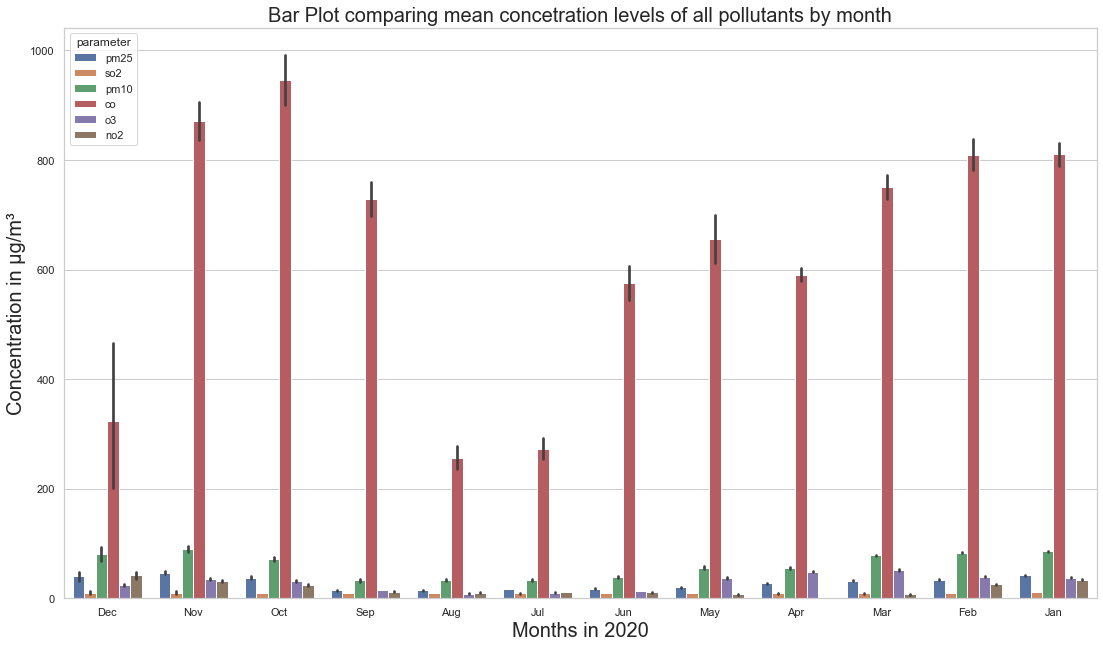

In [8]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="month", y="value",hue="parameter", data=df)
plt.title('Bar Plot comparing mean concetration levels of all pollutants by month',fontsize=20)
plt.ylabel('Concentration in µg/m³',fontsize=20)
plt.xlabel('Months in 2020',fontsize=20)
plt.show()

In [9]:
df.parameter.value_counts()

pm10    10603
pm25    10326
so2     10178
co      10177
no2     10159
o3       9697
Name: parameter, dtype: int64

In [10]:
x = df[(df["parameter"]=="pm10") & (df["value"]<157)][["parameter","value","month"]]

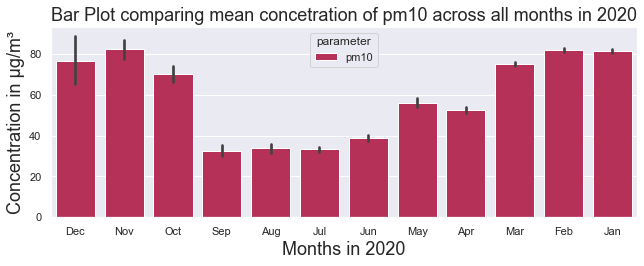

In [11]:
fig=plt.gcf()
fig.set_size_inches(10.5,3.5)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x = "month" , y="value",hue="parameter",data = x,palette="rocket")
plt.title('Bar Plot comparing mean concetration of pm10 across all months in 2020',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Months in 2020',fontsize=18)
plt.show()

In [12]:
Jan = np.array(x[x.month == 'Jan']['value'][:2249])
Feb = np.array(x[x.month == 'Feb']['value'][:2249])
Mar = np.array(x[x.month == 'Mar']['value'][:2249])

In [13]:
anov_pm10 = pd.DataFrame({'Jan':Jan,
                         'Feb':Feb,
                         'Mar':Mar
                       })


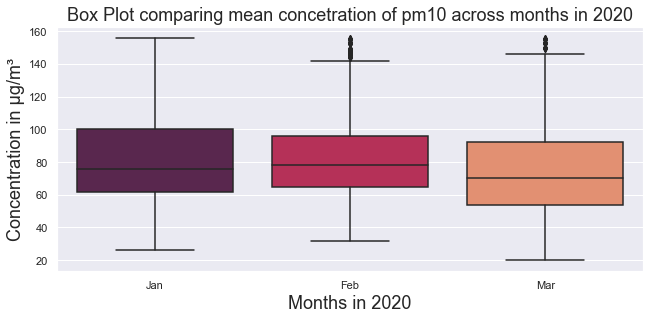

In [14]:
fig=plt.gcf()
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data = anov_pm10,palette="rocket")
plt.title('Box Plot comparing mean concetration of pm10 across months in 2020',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Months in 2020',fontsize=18)
plt.show()

In [15]:
aov1 = sp.f_oneway(anov_pm10['Jan'],anov_pm10['Feb'],anov_pm10['Mar'])

In [16]:
aov1

F_onewayResult(statistic=58.54191052417811, pvalue=6.219404325709319e-26)

In [17]:
anov_pm10 = anov_pm10.drop(columns=["Mar"])

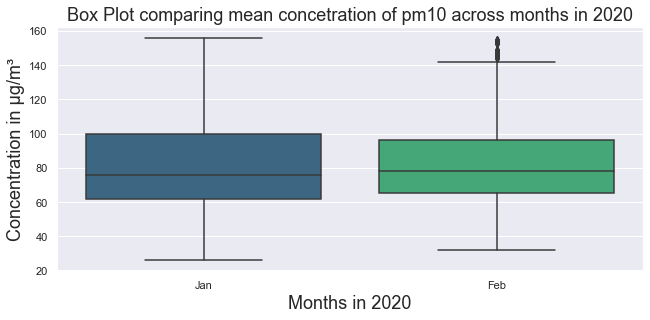

In [18]:
fig=plt.gcf()
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data = anov_pm10,palette="viridis")
plt.title('Box Plot comparing mean concetration of pm10 across months in 2020',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Months in 2020',fontsize=18)
plt.show()

In [19]:
aov1 = sp.f_oneway(anov_pm10['Jan'],anov_pm10['Feb'])
aov1

F_onewayResult(statistic=1.6726981060255917, pvalue=0.1959639802656701)

In [20]:
df.groupby('month').count()

,parameter,value,unit,day
month,,,,
Apr,6588,6588,6588,6588
Aug,961,961,961,961
Dec,126,126,126,126
Feb,13305,13305,13305,13305
Jan,14639,14639,14639,14639
Jul,3114,3114,3114,3114
Jun,2508,2508,2508,2508
Mar,13594,13594,13594,13594
May,1785,1785,1785,1785


In [21]:
x = df[df["month"]=="Feb"][["parameter","value","month","day"]]


In [22]:
pm10_weekly = x[x.parameter=="pm10"]
pm10_weekly = pm10_weekly[pm10_weekly.value<155]
pm10_weekly.day = pm10_weekly.day.map(lambda t : int(t))

In [23]:
week1_pm10 = np.array(pm10_weekly[(pm10_weekly.day<=7) & (pm10_weekly.day>=1)]["value"][:545])
week2_pm10 = np.array(pm10_weekly[(pm10_weekly.day<=15) & (pm10_weekly.day>=8)]["value"][:545])
week3_pm10 = np.array(pm10_weekly[(pm10_weekly.day<=22) & (pm10_weekly.day>=16)]["value"][:545])
week4_pm10 = np.array(pm10_weekly[(pm10_weekly.day>=23)]["value"][:545])

In [24]:
weekly_df = pd.DataFrame({"Week1":week1_pm10,
                          "Week2":week2_pm10,
                          "Week3":week2_pm10,
                          "Week4":week2_pm10
                         })


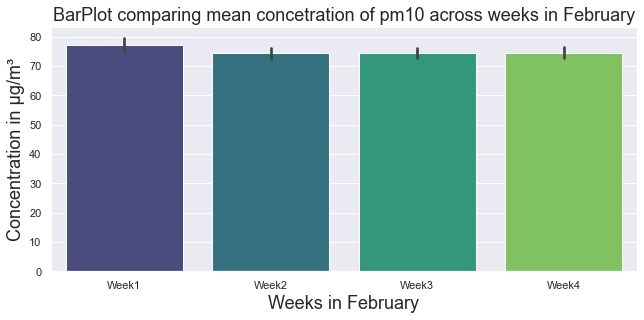

In [25]:
fig=plt.gcf()
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.barplot(data = weekly_df,palette="viridis")
plt.title('BarPlot comparing mean concetration of pm10 across weeks in February',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Weeks in February',fontsize=18)
plt.show()

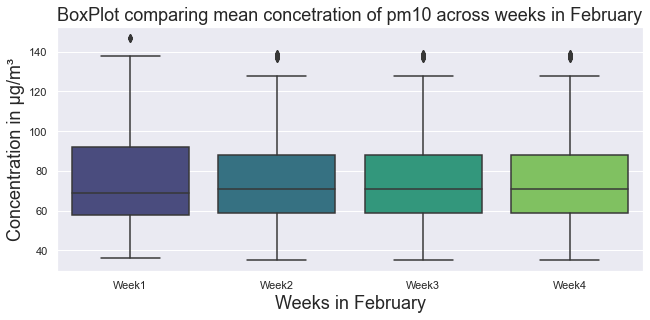

In [26]:
fig=plt.gcf()
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data = weekly_df,palette="viridis")
plt.title('BoxPlot comparing mean concetration of pm10 across weeks in February',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Weeks in February',fontsize=18)
plt.show()

In [27]:
aov1 = sp.f_oneway(weekly_df["Week1"],weekly_df["Week2"],weekly_df["Week3"],weekly_df["Week4"])
aov1

F_onewayResult(statistic=1.8868206507943788, pvalue=0.12968935926518063)

In [28]:
x = df[df["month"]=="Jan"][["parameter","value","month","day"]]

In [29]:
o3_weekly = x[x.parameter=="o3"]
o3_weekly.day = o3_weekly.day.map(lambda t : int(t))

In [30]:
day1_week3 = np.array(o3_weekly[(o3_weekly.day==19)]["value"][:80])
day2_week3 = np.array(o3_weekly[(o3_weekly.day==20)]["value"][:80])
day3_week3 = np.array(o3_weekly[(o3_weekly.day==21)]["value"][:80])
day4_week3 = np.array(o3_weekly[(o3_weekly.day==22)]["value"][:80])
day5_week3 = np.array(o3_weekly[(o3_weekly.day==23)]["value"][:80])
day6_week3 = np.array(o3_weekly[(o3_weekly.day==24)]["value"][:80])
day7_week3 = np.array(o3_weekly[(o3_weekly.day==25)]["value"][:80])

In [31]:
daily_df = pd.DataFrame({"Day1":day1_week3,
                          "Day2":day2_week3,
                          "Day3":day3_week3,
                          "Day4":day4_week3,
                          "Day5":day5_week3,
                          "Day6":day6_week3,
                          "Day7":day7_week3
                         })


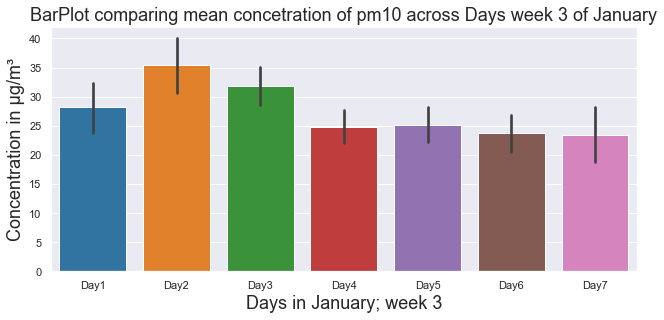

In [32]:
fig=plt.gcf()
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.barplot(data = daily_df,palette="tab10")
plt.title('BarPlot comparing mean concetration of pm10 across Days week 3 of January',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Days in January; week 3',fontsize=18)
plt.show()

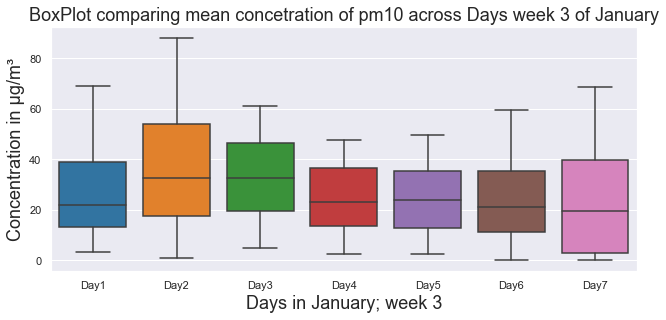

In [33]:
fig=plt.gcf()
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data = daily_df,palette="tab10")
plt.title('BoxPlot comparing mean concetration of pm10 across Days week 3 of January',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Days in January; week 3',fontsize=18)
plt.show()

In [34]:
aov1 = sp.f_oneway(daily_df["Day1"],daily_df["Day2"],daily_df["Day3"],daily_df["Day4"],daily_df["Day5"],daily_df["Day6"],daily_df["Day7"])
aov1

F_onewayResult(statistic=5.651093387994251, pvalue=1.0365741506210747e-05)

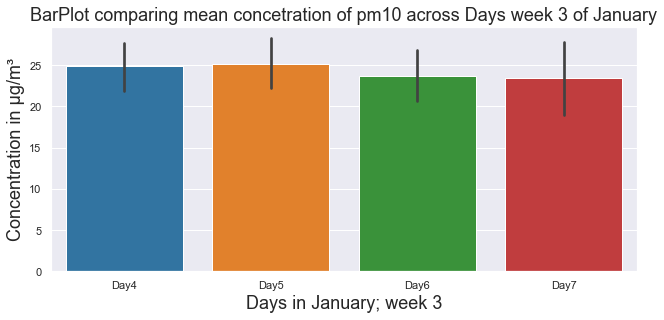

In [35]:
daily_df = daily_df.drop(columns=["Day1","Day2","Day3"])
fig=plt.gcf()
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.barplot(data = daily_df,palette="tab10")
plt.title('BarPlot comparing mean concetration of pm10 across Days week 3 of January',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Days in January; week 3',fontsize=18)
plt.show()

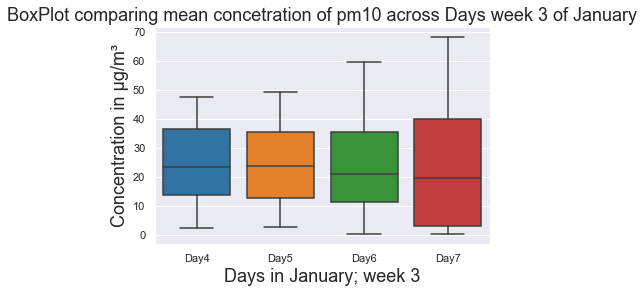

In [36]:
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data = daily_df,palette="tab10")
plt.title('BoxPlot comparing mean concetration of pm10 across Days week 3 of January',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Days in January; week 3',fontsize=18)
plt.show()

In [37]:
aov1 = sp.f_oneway(daily_df["Day4"],daily_df["Day5"],daily_df["Day6"],daily_df["Day7"])
aov1

F_onewayResult(statistic=0.22723021269478966, pvalue=0.8774217844731158)

In [38]:
df1 = pd.read_csv('Bangalore.csv')
df1.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,pm25,17.00,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
1,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,so2,11.90,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
2,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,pm10,98.00,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
3,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,co,80.00,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
4,"Hebbal, Bengaluru - KSPCB",Bengaluru,IN,2020-12-30T11:45:00Z,2020-12-30T17:15:00+05:30,o3,25.09,µg/m³,13.029152,77.585901,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


In [39]:
df1.drop(columns=['attribution','latitude','longitude','country','city','location','utc'],inplace=True)

In [40]:
df1

,local,parameter,value,unit
0,2020-12-30T17:15:00+05:30,pm25,17.00,µg/m³
1,2020-12-30T17:15:00+05:30,so2,11.90,µg/m³
2,2020-12-30T17:15:00+05:30,pm10,98.00,µg/m³
3,2020-12-30T17:15:00+05:30,co,80.00,µg/m³
4,2020-12-30T17:15:00+05:30,o3,25.09,µg/m³
...,...,...,...,...
61147,2020-01-01T02:30:00+05:30,pm10,96.00,µg/m³
61148,2020-01-01T02:30:00+05:30,co,610.00,µg/m³
61149,2020-01-01T02:30:00+05:30,so2,14.60,µg/m³
61150,2020-01-01T02:30:00+05:30,o3,32.67,µg/m³


In [41]:
df1= df1[df1['value'] != 0]
df1

,local,parameter,value,unit
0,2020-12-30T17:15:00+05:30,pm25,17.00,µg/m³
1,2020-12-30T17:15:00+05:30,so2,11.90,µg/m³
2,2020-12-30T17:15:00+05:30,pm10,98.00,µg/m³
3,2020-12-30T17:15:00+05:30,co,80.00,µg/m³
4,2020-12-30T17:15:00+05:30,o3,25.09,µg/m³
...,...,...,...,...
61147,2020-01-01T02:30:00+05:30,pm10,96.00,µg/m³
61148,2020-01-01T02:30:00+05:30,co,610.00,µg/m³
61149,2020-01-01T02:30:00+05:30,so2,14.60,µg/m³
61150,2020-01-01T02:30:00+05:30,o3,32.67,µg/m³


In [42]:
df1["time"] = df1["local"].map(lambda x:x[11:16])
df1

,local,parameter,value,unit,time
0,2020-12-30T17:15:00+05:30,pm25,17.00,µg/m³,17:15
1,2020-12-30T17:15:00+05:30,so2,11.90,µg/m³,17:15
2,2020-12-30T17:15:00+05:30,pm10,98.00,µg/m³,17:15
3,2020-12-30T17:15:00+05:30,co,80.00,µg/m³,17:15
4,2020-12-30T17:15:00+05:30,o3,25.09,µg/m³,17:15
...,...,...,...,...,...
61147,2020-01-01T02:30:00+05:30,pm10,96.00,µg/m³,02:30
61148,2020-01-01T02:30:00+05:30,co,610.00,µg/m³,02:30
61149,2020-01-01T02:30:00+05:30,so2,14.60,µg/m³,02:30
61150,2020-01-01T02:30:00+05:30,o3,32.67,µg/m³,02:30


In [43]:
df1.local = df1.local.map(lambda x:x.replace(x,x[:10]))
df1.local = df1.local.map(lambda x:str(datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%d %b")))
df1.head()

,local,parameter,value,unit,time
0,30 Dec,pm25,17.00,µg/m³,17:15
1,30 Dec,so2,11.90,µg/m³,17:15
2,30 Dec,pm10,98.00,µg/m³,17:15
3,30 Dec,co,80.00,µg/m³,17:15
4,30 Dec,o3,25.09,µg/m³,17:15


In [44]:
df1["day"] = df1["local"].map(lambda x: x[:3])
df1["month"] = df1["local"].map(lambda x: x[3:])
df1 = df1.drop(columns=["local"])


In [45]:
x = df1[df1.month=="Mar"]


In [46]:
x.time = x.time.map(lambda x:int(x[:2]))


### Time period division
### T1 : 00:00- 05:59
### T2 : 06:00- 11:59
### T3 : 12:00- 17:59
### T4 : 18:00- 23:59

In [47]:
def apply_time_T(i):
    if i>=18:
        return "T4"
    elif i<18 and i>=12:
        return "T3"
    elif i<=11 and i>5:
        return "T2"
    else:
        return "T1"
    
x.time = x.time.map(apply_time_T)


In [48]:
x = x[(x["parameter"]=="so2") & (x["value"]<16) & (x["value"]>2)]


In [49]:
time_1 = np.array(x[(x.time=="T1")]["value"][:495])
time_2 = np.array(x[(x.time=="T2")]["value"][:495])
time_3 = np.array(x[(x.time=="T3")]["value"][:495])
time_4 = np.array(x[(x.time=="T4")]["value"][:495])

In [50]:
time_based_df = pd.DataFrame({"T1(00:00-05:59)":time_1,
                              "T2(06:00-11:59)":time_2,
                              "T3(12:00-17:59)":time_3,
                              "T4(18:00-23:59)":time_4})


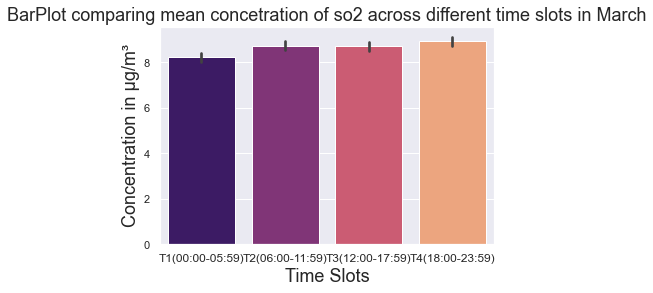

In [51]:
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.barplot(data = time_based_df,palette="magma")
plt.title('BarPlot comparing mean concetration of so2 across different time slots in March',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Time Slots',fontsize=18)
plt.xticks(fontsize=12)
plt.show()

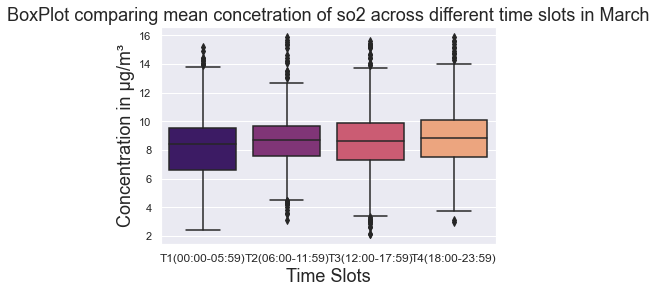

In [52]:
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data = time_based_df,palette="magma")
plt.title('BoxPlot comparing mean concetration of so2 across different time slots in March',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Time Slots',fontsize=18)
plt.xticks(fontsize=12)
plt.show()

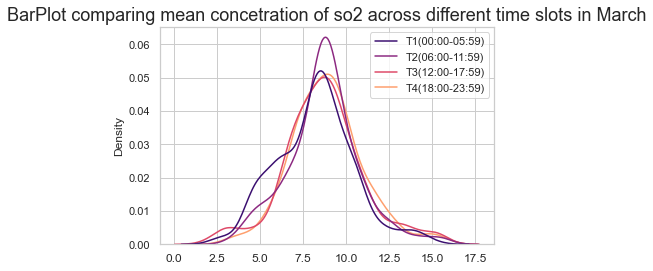

In [53]:
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="whitegrid")
ax = sns.kdeplot(data = time_based_df,palette="magma")
plt.title('BarPlot comparing mean concetration of so2 across different time slots in March',fontsize=18)

plt.xticks(fontsize=12)
plt.show()

In [54]:
aov1 = sp.f_oneway(time_based_df["T1(00:00-05:59)"],time_based_df["T2(06:00-11:59)"],time_based_df["T3(12:00-17:59)"],time_based_df["T4(18:00-23:59)"])
aov1

F_onewayResult(statistic=8.61930221543468, pvalue=1.103891203924786e-05)

In [55]:
time_based_df = pd.DataFrame({"T2(06:00-11:59)":time_2,
                              "T3(12:00-17:59)":time_3,
                              "T4(18:00-23:59)":time_4})

In [56]:
x = df1[df1.month=="Mar"]

In [57]:
x = x[(x["parameter"]=="so2") & (x["value"]<13.8) & (x["value"]>3)]

In [58]:
x.time = x.time.map(lambda x:int(x[:2]))
x.time = x.time.map(apply_time_T)

In [59]:
time_2 = np.array(x[(x.time=="T2")]["value"][:484])
time_3 = np.array(x[(x.time=="T3")]["value"][:484])
time_4 = np.array(x[(x.time=="T4")]["value"][:484])

In [60]:
time_based_df = pd.DataFrame({"T2(06:00-11:59)":time_2,
                              "T3(12:00-17:59)":time_3,
                              "T4(18:00-23:59)":time_4})

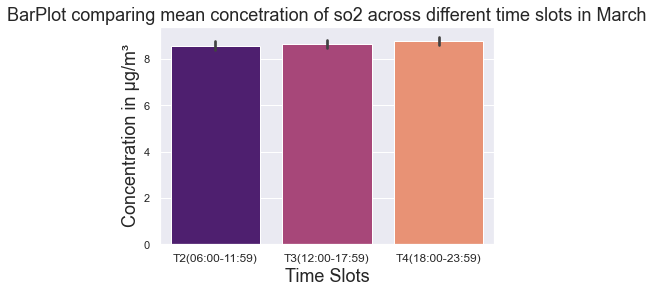

In [61]:
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.barplot(data = time_based_df,palette="magma")
plt.title('BarPlot comparing mean concetration of so2 across different time slots in March',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Time Slots',fontsize=18)
plt.xticks(fontsize=12)
plt.show()

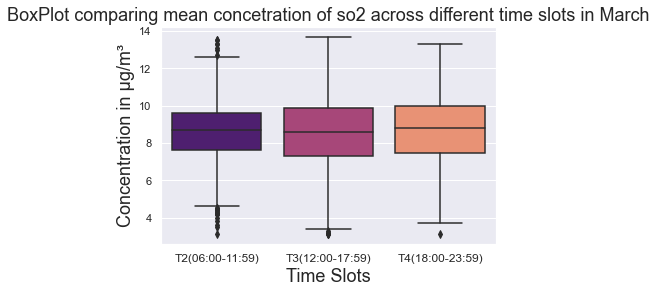

In [62]:
fig.set_size_inches(10.5,4.5)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data = time_based_df,palette="magma")
plt.title('BoxPlot comparing mean concetration of so2 across different time slots in March',fontsize=18)
plt.ylabel('Concentration in µg/m³',fontsize=18)
plt.xlabel('Time Slots',fontsize=18)
plt.xticks(fontsize=12)
plt.show()

In [63]:
aov1 = sp.f_oneway(time_based_df["T2(06:00-11:59)"],time_based_df["T3(12:00-17:59)"],time_based_df["T4(18:00-23:59)"])
aov1

F_onewayResult(statistic=1.3038720330361324, pvalue=0.2717969064259915)